In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


## 1. Preprocessing Dataset
  
0. Read data
1. Integrate into one mask
2. Resize to (256, 256)  
3. Split dataset
4. Data Augmentation

In [ ]:
from matplotlib import pyplot as plt

import numpy as np
import random
import cv2
import os

size = 256
base_dir = "/content/MyDrive/MyDrive/Colab Notebooks/Pulmonary Chest X-Ray Abnormalities/"

In [ ]:
def Image_Newaxis(image, mask):
    image = np.reshape(image, (size, size, 1))
    mask = np.reshape(mask, (size, size, 1))
    return image/255., mask

138


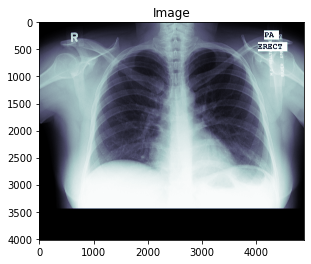

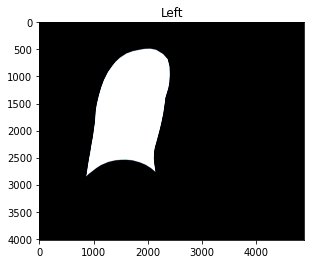

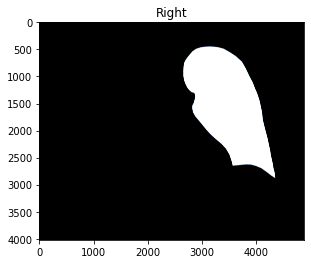

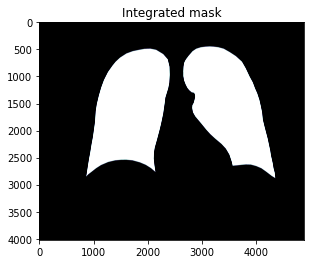

In [ ]:
file_list = os.listdir(base_dir +"CXR_png/")
print(len(file_list))

for i, file_name in enumerate(file_list):
    # 0. Read data
    file_name = "MCUCXR_0001_0.png"
    image = cv2.imread(base_dir + f"CXR_png/{file_name}", 0)
    mask_l = cv2.imread(base_dir + f"ManualMask/leftMask/{file_name}", 0)
    mask_r = cv2.imread(base_dir + f"ManualMask/rightMask/{file_name}", 0)
    fig0 = plt.figure(0)
    plt.imshow(image, cmap = "bone")
    plt.title("Image")

    fig1 = plt.figure(1)
    plt.imshow(mask_l, cmap = "bone")
    plt.title("Left")

    fig2 = plt.figure(2)
    plt.imshow(mask_r, cmap = "bone")
    plt.title("Right")

    # 1. Integrate into one mask
    _, mask_l = cv2.threshold(mask_l, 1, 1, cv2.THRESH_BINARY)
    _, mask_r = cv2.threshold(mask_r, 1, 1, cv2.THRESH_BINARY)
    mask = cv2.bitwise_or(mask_l, mask_r)
    del mask_l, mask_r
    
    fig3 = plt.figure(3)
    plt.imshow(mask, cmap = "bone")
    plt.title("Integrated mask")
    
    if i == 0:
        break

In [ ]:
file_list = os.listdir(base_dir +"CXR_png/")
print(len(file_list))
random.shuffle(file_list)

train_x = np.zeros((90 * 5, size, size, 1), dtype = np.float)
train_y = np.zeros((90 * 5, size, size, 1), dtype = np.float)

valid_x = np.zeros((20 * 5, size, size, 1), dtype = np.float)
valid_y = np.zeros((20 * 5, size, size, 1), dtype = np.float)

test_x = np.zeros((28, size, size, 1), dtype = np.float)
test_y = np.zeros((28, size, size, 1), dtype = np.float)

for i, file_name in enumerate(file_list):
    # 0. Read data
    image = cv2.imread(base_dir + f"CXR_png/{file_name}", 0)
    mask_l = cv2.imread(base_dir + f"ManualMask/leftMask/{file_name}", 0)
    mask_r = cv2.imread(base_dir + f"ManualMask/rightMask/{file_name}", 0)
    
    # 1. Integrate into one mask
    _, mask_l = cv2.threshold(mask_l, 1, 1, cv2.THRESH_BINARY)
    _, mask_r = cv2.threshold(mask_r, 1, 1, cv2.THRESH_BINARY)
    mask = cv2.bitwise_or(mask_l, mask_r)
    del mask_l, mask_r
    
    # 2. Resize to (256, 256)
    image = cv2.resize(image, dsize=(size, size), interpolation=cv2.INTER_AREA)
    mask = cv2.resize(mask, dsize=(size, size), interpolation=cv2.INTER_AREA)
    
    """
    # 3. Save
    #cv2.imwrite(base_dir + f"CXR_png/{file_name}", image)
    #cv2.imwrite(base_dir + f"Mask/{file_name}", mask)
    fig1 = plt.figure(0)
    plt.imshow(image)
    fig2 = plt.figure(1)
    plt.imshow(mask)
    """
    # 3. Split dataset and Data augmentation
    if i < 110:
        lr_image, lr_mask = Image_Newaxis(cv2.flip(image, 1), cv2.flip(mask, 1))
        ud_image, ud_mask = Image_Newaxis(cv2.flip(image, 0), cv2.flip(mask, 0))
        rot90_image, rot90_mask = Image_Newaxis(cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE), cv2.rotate(mask, cv2.ROTATE_90_CLOCKWISE))
        rot270_image, rot270_mask = Image_Newaxis(cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE), cv2.rotate(mask, cv2.ROTATE_90_COUNTERCLOCKWISE))
        
        image, mask = Image_Newaxis(image, mask)
        if i < 90:
            print(f"Train dateset : {i}")
            train_x[5*(i-1)] = image
            train_x[5*(i-1)+1] = lr_image
            train_x[5*(i-1)+2] = ud_image
            train_x[5*(i-1)+3] = rot90_image
            train_x[5*(i-1)+4] = rot270_image
            
            train_y[5*(i-1)] = mask
            train_y[5*(i-1)+1] = lr_mask
            train_y[5*(i-1)+2] = ud_mask
            train_y[5*(i-1)+3] = rot90_mask
            train_y[5*(i-1)+4] = rot270_mask
            
        
        elif 90 <= i < 110:
            print(f"Valid dateset : {i}")
            valid_x[5*(i-90)] = image
            valid_x[5*(i-90)+1] = lr_image
            valid_x[5*(i-90)+2] = ud_image
            valid_x[5*(i-90)+3] = rot90_image
            valid_x[5*(i-90)+4] = rot270_image
            
            valid_y[5*(i-90)] = mask
            valid_y[5*(i-90)+1] = lr_mask
            valid_y[5*(i-90)+2] = ud_mask
            valid_y[5*(i-90)+3] = rot90_mask
            valid_y[5*(i-90)+4] = rot270_mask
        
    else:
        print(f"Test dataset : {i}")
        image, mask = Image_Newaxis(image, mask)
        test_x[i-110] = image
        test_y[i-110] = mask

138
Train dateset : 0
Train dateset : 1
Train dateset : 2
Train dateset : 3
Train dateset : 4
Train dateset : 5
Train dateset : 6
Train dateset : 7
Train dateset : 8
Train dateset : 9
Train dateset : 10
Train dateset : 11
Train dateset : 12
Train dateset : 13
Train dateset : 14
Train dateset : 15
Train dateset : 16
Train dateset : 17
Train dateset : 18
Train dateset : 19
Train dateset : 20
Train dateset : 21
Train dateset : 22
Train dateset : 23
Train dateset : 24
Train dateset : 25
Train dateset : 26
Train dateset : 27
Train dateset : 28
Train dateset : 29
Train dateset : 30
Train dateset : 31
Train dateset : 32
Train dateset : 33
Train dateset : 34
Train dateset : 35
Train dateset : 36
Train dateset : 37
Train dateset : 38
Train dateset : 39
Train dateset : 40
Train dateset : 41
Train dateset : 42
Train dateset : 43
Train dateset : 44
Train dateset : 45
Train dateset : 46
Train dateset : 47
Train dateset : 48
Train dateset : 49
Train dateset : 50
Train dateset : 51
Train dateset : 52

In [ ]:
print(f"train_x shape : {train_x.shape}, train_y.shape : {train_y.shape}")
print(f"valid_x shape : {valid_x.shape}, valid_y.shape : {valid_y.shape}")
print(f"test_x shape : {test_x.shape}, test_y.shape : {test_y.shape}")

train_x shape : (450, 256, 256, 1), train_y.shape : (450, 256, 256, 1)
valid_x shape : (100, 256, 256, 1), valid_y.shape : (100, 256, 256, 1)
test_x shape : (28, 256, 256, 1), test_y.shape : (28, 256, 256, 1)


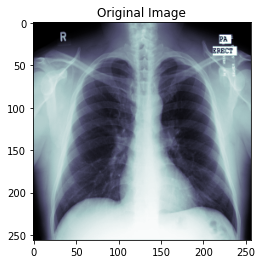

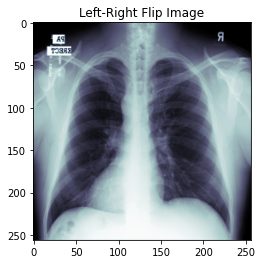

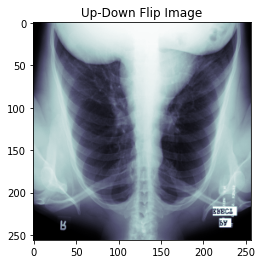

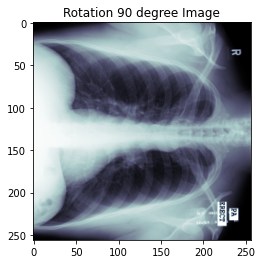

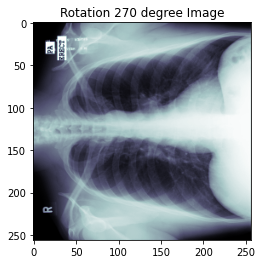

In [ ]:
# train image sample
title_list = ["Original Image", "Left-Right Flip Image", "Up-Down Flip Image", "Rotation 90 degree Image", "Rotation 270 degree Image"]
for i in range(5):
    sample = np.reshape(train_x[i], (size, size))
    fig = plt.figure(i)
    plt.imshow(sample, cmap = "bone")
    plt.title(title_list[i])

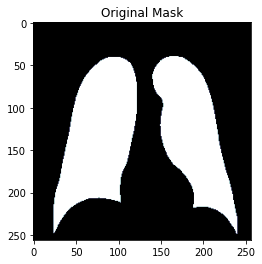

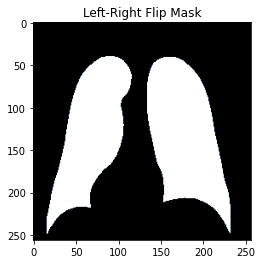

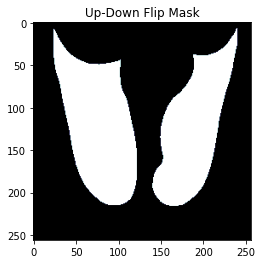

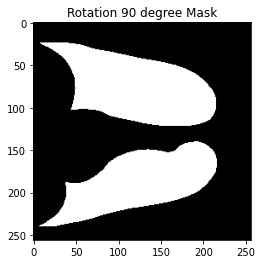

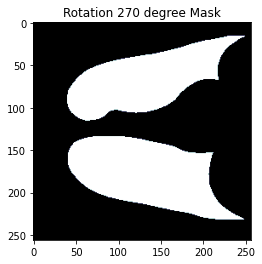

In [ ]:
# train mask sample
title_list = ["Original Mask", "Left-Right Flip Mask", "Up-Down Flip Mask", "Rotation 90 degree Mask", "Rotation 270 degree Mask"]
for i in range(5):
    sample = np.reshape(train_y[i], (size, size))
    fig = plt.figure(i)
    plt.imshow(sample, cmap = "bone")
    plt.title(title_list[i])

## 2. U-Net

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, concatenate, Activation


def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    # first layer
    x = Conv2D(filters = n_filters,
               kernel_size = (kernel_size, kernel_size),
               kernel_initializer = 'he_normal',
               padding = 'same')(input_tensor)
    
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # second layer
    x = Conv2D(filters = n_filters,
               kernel_size = (kernel_size, kernel_size),
               kernel_initializer = 'he_normal', 
               padding = 'same')(x)
    
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x

def get_unet(dropout = 0.1, batchnorm = True):
    inputs = Input((size, size, 1))
    
    # Contracting Path
    c1 = conv2d_block(inputs, 64, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)

    c2 = conv2d_block(p1, 128, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, 256, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, 512, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)

    c5 = conv2d_block(p4, 1024, kernel_size = 3, batchnorm = batchnorm)

    # Expansive Path
    u6 = Conv2DTranspose(512, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, 512, kernel_size = 3, batchnorm = batchnorm)

    u7 = Conv2DTranspose(256, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, 256, kernel_size = 3, batchnorm = batchnorm)

    u8 = Conv2DTranspose(128, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, 128, kernel_size = 3, batchnorm = batchnorm)

    u9 = Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, 64, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
UNet = get_unet()

In [ ]:
UNet.summary()

Model: "model_61"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_855 (Conv2D)             (None, 256, 256, 64) 640         input_46[0][0]                   
__________________________________________________________________________________________________
batch_normalization_810 (BatchN (None, 256, 256, 64) 256         conv2d_855[0][0]                 
__________________________________________________________________________________________________
activation_810 (Activation)     (None, 256, 256, 64) 0           batch_normalization_810[0][0]    
___________________________________________________________________________________________

In [ ]:
def Dice(y_true, y_pred):
    """
    Dice
    
    Dice = 2TP / (2TP + FP + FN) = 2|X∩Y| / (|X| + |Y|) 
         = sum(2 X*Y) / (sum(X) +sum(Y))
    """ 
    smooth = 0.0001
        
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (numerator + smooth) / (denominator + smooth)

In [ ]:
class DiceCELoss(tf.losses.Loss):
    def __init__(self):
        super(DiceCELoss, self).__init__(reduction = 'auto', name = "DiceCELoss")
        
    def call(self, y_true, y_pred):
        dice = Dice(y_true, y_pred)
        bce = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))
        return 1 - dice + bce

In [ ]:
del UNet
UNet = get_unet()
UNet.compile(optimizer =  tf.keras.optimizers.Adam(learning_rate = 0.0005),
             loss = DiceCELoss(),
             metrics = [Dice, 'accuracy'])
    
callbacks_list = [tf.keras.callbacks.ModelCheckpoint(
                                        filepath=os.path.join(
                                            "/content/MyDrive/MyDrive/Colab Notebooks/kaggle_drop_{epoch}.h5"),
                                            #monitor="val_loss",
                                            monitor="val_Dice",
                                            mode = "max",
                                            save_best_only = False,
                                            save_weights_only = True,
                                            verbose=1,
                                        )
                  ]

history = UNet.fit(train_x, train_y,
                   validation_data = (valid_x, valid_y),
                   callbacks = callbacks_list,
                   epochs = 500,
                   batch_size = 1,
                   shuffle = True,
                  )

Epoch 1/500
450/450 [==============================] - 21s 40ms/step - loss: 0.3898 - Dice: 0.8065 - accuracy: 0.9244 - val_loss: 3.6089 - val_Dice: 0.0142 - val_accuracy: 0.6318

Epoch 00001: saving model to /content/MyDrive/MyDrive/Colab Notebooks/kaggle_drop_1.h5
Epoch 2/500
450/450 [==============================] - 17s 38ms/step - loss: 0.2059 - Dice: 0.9003 - accuracy: 0.9620 - val_loss: 0.3774 - val_Dice: 0.8294 - val_accuracy: 0.9375

Epoch 00002: saving model to /content/MyDrive/MyDrive/Colab Notebooks/kaggle_drop_2.h5
Epoch 3/500
450/450 [==============================] - 17s 38ms/step - loss: 0.1350 - Dice: 0.9363 - accuracy: 0.9757 - val_loss: 0.1331 - val_Dice: 0.9374 - val_accuracy: 0.9749

Epoch 00003: saving model to /content/MyDrive/MyDrive/Colab Notebooks/kaggle_drop_3.h5
Epoch 4/500
450/450 [==============================] - 17s 38ms/step - loss: 0.1031 - Dice: 0.9515 - accuracy: 0.9814 - val_loss: 0.1183 - val_Dice: 0.9450 - val_accuracy: 0.9784

Epoch 00004: saving

KeyboardInterrupt: ignored

In [ ]:
model = get_unet()
model.load_weights("/content/MyDrive/MyDrive/Colab Notebooks/kaggle_1.h5"),
model.compile(loss = DiceCELoss(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [Dice, 'accuracy']
              )
_, dice, _ = model.evaluate(test_x, test_y, batch_size = 1, verbose = 2)
print(f"Dice : {dice*100:.3f}")

28/28 - 1s - loss: 0.1209 - Dice: 0.9527 - accuracy: 0.9788
Dice : 95.273


In [ ]:
model = get_unet()
model.load_weights("/content/MyDrive/MyDrive/Colab Notebooks/kaggle_5.h5"),
model.compile(loss = DiceCELoss(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [Dice, 'accuracy']
              )
_, dice, _ = model.evaluate(test_x, test_y, batch_size = 1, verbose = 2)
print(f"Dice : {dice*100:.3f}")

28/28 - 1s - loss: 0.1177 - Dice: 0.9456 - accuracy: 0.9785
Dice : 94.558


In [ ]:
model = get_unet()
model.load_weights("/content/MyDrive/MyDrive/Colab Notebooks/kaggle_6.h5"),
model.compile(loss = DiceCELoss(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [Dice, 'accuracy']
              )
_, dice, _ = model.evaluate(test_x, test_y, batch_size = 1, verbose = 2)
print(f"Dice : {dice*100:.3f}")

28/28 - 1s - loss: 0.0990 - Dice: 0.9544 - accuracy: 0.9811
Dice : 95.440


In [ ]:
model = get_unet()
model.load_weights("/content/MyDrive/MyDrive/Colab Notebooks/kaggle_7.h5"),
model.compile(loss = DiceCELoss(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [Dice, 'accuracy']
              )
_, dice, _ = model.evaluate(test_x, test_y, batch_size = 1, verbose = 2)
print(f"Dice : {dice*100:.3f}")

28/28 - 1s - loss: 0.1013 - Dice: 0.9558 - accuracy: 0.9819
Dice : 95.584


In [ ]:
def Evaluation(epoch, num_sample):
    input_image = tf.keras.Input(shape=(size, size, 1), name="image")
    model = get_unet()
    model.load_weights(f"/content/MyDrive/MyDrive/Colab Notebooks/kaggle_{epoch}.h5")

    model.compile(loss = DiceCELoss(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics = [Dice]
                  )

    _, dice = model.evaluate(test_x, test_y, batch_size = 1, verbose= 2)
    print(f"\n\nDice : {dice*100:.3f}\n\n")
    predictions = model(input_image, training = False)
    inference_model = tf.keras.Model(inputs=input_image, outputs=predictions)

    print("Display predictions")
    for i in range(28):
        img, mask = test_x[i], test_y[i]
        img = np.reshape(img, ((1,) + img.shape))
        mask = np.reshape(mask, ((1,) + mask.shape))
        
        prediction = model.predict(img)
        prediction = prediction[0]
        #prediction = (prediction > 0.5).astype(np.uint8)
        prediction = np.reshape(prediction, (size, size))

        img, mask = img[0], mask[0]
        img, mask = np.reshape(img, (size, size)), np.reshape(mask, (size, size))
        fig = plt.figure(i, figsize = (20,20))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(img, cmap = "bone")
        ax1.set_title('Image')
        ax1.axis("off")

        ax2 = fig.add_subplot(1, 3, 2)
        ax2.imshow(mask, cmap = "bone")
        ax2.set_title('Ground Truth Mask')
        ax2.axis("off")

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.imshow(prediction, cmap = "bone")
        ax3.set_title('Prediction')
        ax3.axis("off")
        plt.show()

        if i == num_sample-1:
            break

In [ ]:
Evaluation(epoch=7, num_sample = 28)

Output hidden; open in https://colab.research.google.com to view.

### Test Time Augmentation (TTA)

In [ ]:
def Image_Newaxis_2(image):
    image = np.reshape(image, (1, size, size, 1))
    return image

In [ ]:
def Image_Newaxis_3(image):
    image = image[0]
    image = np.reshape(image, (size, size))
    return image

In [ ]:
def Evaluation(epoch, num_sample):
    input_image = tf.keras.Input(shape=(size, size, 1), name="image")
    model = get_unet()
    model.load_weights(f"/content/MyDrive/MyDrive/Colab Notebooks/kaggle_drop_{epoch}.h5")

    model.compile(loss = DiceCELoss(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics = [Dice]
                  )

    print("Display predictions")
    Dice_list = []
    TTA_Dice_list = []
    for i in range(28):
        img, mask = test_x[i], test_y[i]
        img, mask = np.reshape(img, (size, size)), np.reshape(mask, (size, size))

        images = [Image_Newaxis_2(img),
                  Image_Newaxis_2(cv2.flip(img, 1)),
                  Image_Newaxis_2(cv2.flip(img, 0)),
                  Image_Newaxis_2(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)),
                  Image_Newaxis_2(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))
                  ]
        
        output = np.zeros((size, size))
        predictions = []

        for t in range(5):
            prediction = model.predict(images[t])
            prediction = prediction[0]
            prediction = (prediction > 0.5).astype(np.float)
            prediction = np.reshape(prediction, (size, size))
            if t == 0:
                prediction = prediction
                dice = Dice(mask, prediction)
                print(f"{i+1}th Dice : {dice * 100 :.3f}")
                Dice_list.append(dice)
            elif t == 1:
                prediction = cv2.flip(prediction, 1)
            elif t == 2:
                prediction = cv2.flip(prediction, 0)
            elif t == 3:
                prediction = cv2.rotate(prediction, cv2.ROTATE_90_COUNTERCLOCKWISE)
            elif t == 4:
                prediction = cv2.rotate(prediction, cv2.ROTATE_90_CLOCKWISE)
            output += prediction
            predictions.append(prediction)

        output /= 5
        output = (output > 0.5).astype(np.float)
        tta_dice = Dice(mask, output)
        print(f"{i+1}th TTA Dice : {tta_dice * 100 :.3f}")
        TTA_Dice_list.append(tta_dice)

        fig = plt.figure(i, figsize = (24,8))
        # Image and GT
        ax1 = fig.add_subplot(2, 6, 1)
        ax1.imshow(Image_Newaxis_3(images[0]), cmap = "bone")
        ax1.set_title('Original Image')
        ax1.axis("off")

        ax2 = fig.add_subplot(2, 6, 2)
        ax2.imshow(cv2.flip(Image_Newaxis_3(images[1]), 1), cmap = "bone")
        ax2.set_title('LR flip Image')
        ax2.axis("off")

        ax3 = fig.add_subplot(2, 6, 3)
        ax3.imshow(cv2.flip(Image_Newaxis_3(images[2]), 0), cmap = "bone")
        ax3.set_title('UD flip Image')
        ax3.axis("off")

        ax4 = fig.add_subplot(2, 6, 4)
        ax4.imshow(cv2.rotate(Image_Newaxis_3(images[3]), cv2.ROTATE_90_COUNTERCLOCKWISE), cmap = "bone")
        ax4.set_title('Rot_90 Image')
        ax4.axis("off")

        ax5 = fig.add_subplot(2, 6, 5)
        ax5.imshow(cv2.rotate(Image_Newaxis_3(images[4]), cv2.ROTATE_90_CLOCKWISE), cmap = "bone")
        ax5.set_title('Rot_270 Image')
        ax5.axis("off")

        ax6 = fig.add_subplot(2, 6, 6)
        ax6.imshow(mask, cmap = "bone")
        ax6.set_title('Ground Truth Mask')
        ax6.axis("off")

        # Predicion
        ax7 = fig.add_subplot(2, 6, 7)
        ax7.imshow(predictions[0], cmap = "bone")
        ax7.set_title('Original prediction')
        ax7.axis("off")

        ax8 = fig.add_subplot(2, 6, 8)
        ax8.imshow(predictions[1], cmap = "bone")
        ax8.set_title('LR flip prediction')
        ax8.axis("off")

        ax9 = fig.add_subplot(2, 6, 9)
        ax9.imshow(predictions[2], cmap = "bone")
        ax9.set_title('UD flip prediction')
        ax9.axis("off")

        ax10 = fig.add_subplot(2, 6, 10)
        ax10.imshow(predictions[3], cmap = "bone")
        ax10.set_title('Rot_90 prediction')
        ax10.axis("off")

        ax11 = fig.add_subplot(2, 6, 11)
        ax11.imshow(predictions[4], cmap = "bone")
        ax11.set_title('Rot_270 prediction')
        ax11.axis("off")

        ax12 = fig.add_subplot(2, 6, 12)
        ax12.imshow(output, cmap = "bone")
        ax12.set_title('Average Prediction')
        ax12.axis("off")

        plt.show()
        
        if i == num_sample-1:
            break

    print(f"Mean Dice : {sum(Dice_list)/(num_sample)*100:.3f}")
    print(f"Mean TTA Dice : {sum(TTA_Dice_list)/(num_sample)*100:.3f}")

In [ ]:
Evaluation(8, 28)

Output hidden; open in https://colab.research.google.com to view.